# Introduction to Rstudio, and seeing what R can do

In [1]:
library('tidyverse')

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 3. Load and inspect some data

In [2]:
# load data without downloading

con = url('https://github.com/laurafontanesi/r-seminar/blob/main/data/movies.RData?raw=true')
load(con)
close(con)

## 4. Now it's your turn

**Task A** 

1. Plot the relationship between: `imdb_rating`, `imdb_num_votes` and `audience_score`. 
2. Change the coloring of the scatterplot. You can either have a look [here](https://ggplot2.tidyverse.org/reference/scale_gradient.html) or simply change the two colors in the gradients, and have a look for example [here](http://sape.inf.usi.ch/quick-reference/ggplot2/colour).
3. Compute the regression for such relationship.

In [3]:
# These two lines are only to resize plots in the notebook
library(repr)
options(repr.plot.width=12, repr.plot.height=8, repr.plot.pointsize=30)

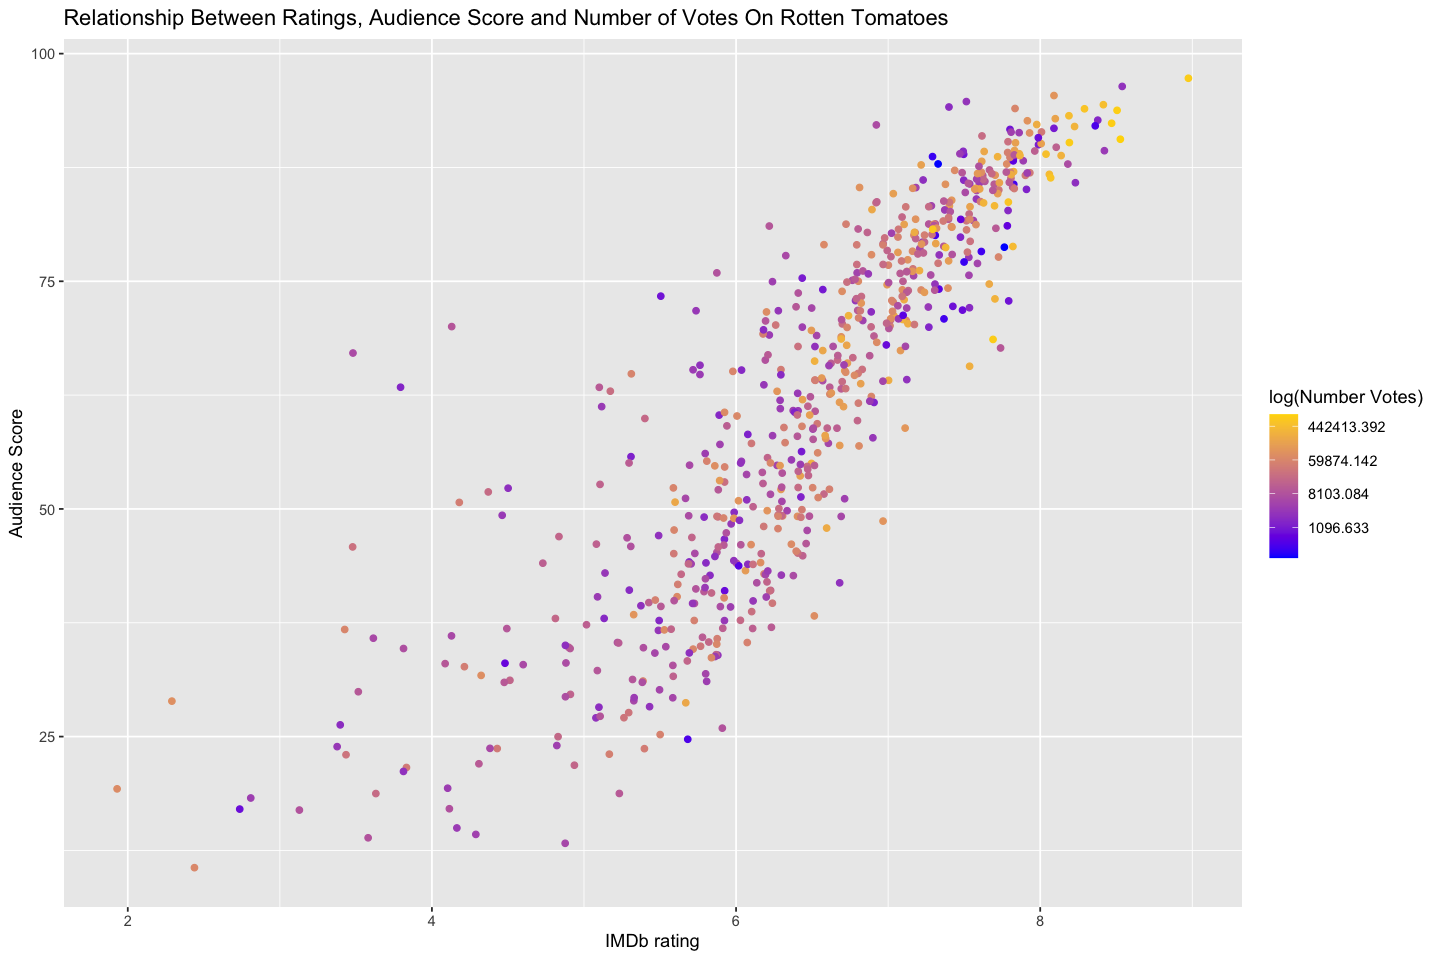

In [4]:
ggplot(data = movies, aes(x = imdb_rating, y = audience_score, color=imdb_num_votes)) +
  geom_jitter() +
  scale_colour_gradient(low = "blue", high = "gold", limits=range(movies[,'imdb_num_votes']), trans='log') +
  labs(x = 'IMDb rating', y = "Audience Score", color="log(Number Votes)") +
  ggtitle("Relationship Between Ratings, Audience Score and Number of Votes On Rotten Tomatoes")

In [5]:
# Run a regression
regression_fit = lm(formula = audience_score ~ imdb_num_votes + imdb_rating, 
                    data = movies)

# Print summary results
summary(regression_fit)


Call:
lm(formula = audience_score ~ imdb_num_votes + imdb_rating, data = movies)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.780  -6.535   0.654   5.701  52.861 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -4.221e+01  2.499e+00 -16.896   <2e-16 ***
imdb_num_votes  6.909e-07  3.769e-06   0.183    0.855    
imdb_rating     1.610e+01  3.896e-01  41.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.17 on 648 degrees of freedom
Multiple R-squared:  0.748,	Adjusted R-squared:  0.7472 
F-statistic: 961.7 on 2 and 648 DF,  p-value: < 2.2e-16


**Task B**

1. Plot the relationship between `best_actor_win`, `best_actress_win` and `audience_score`.
2. Compute the ANOVA for such relationship.

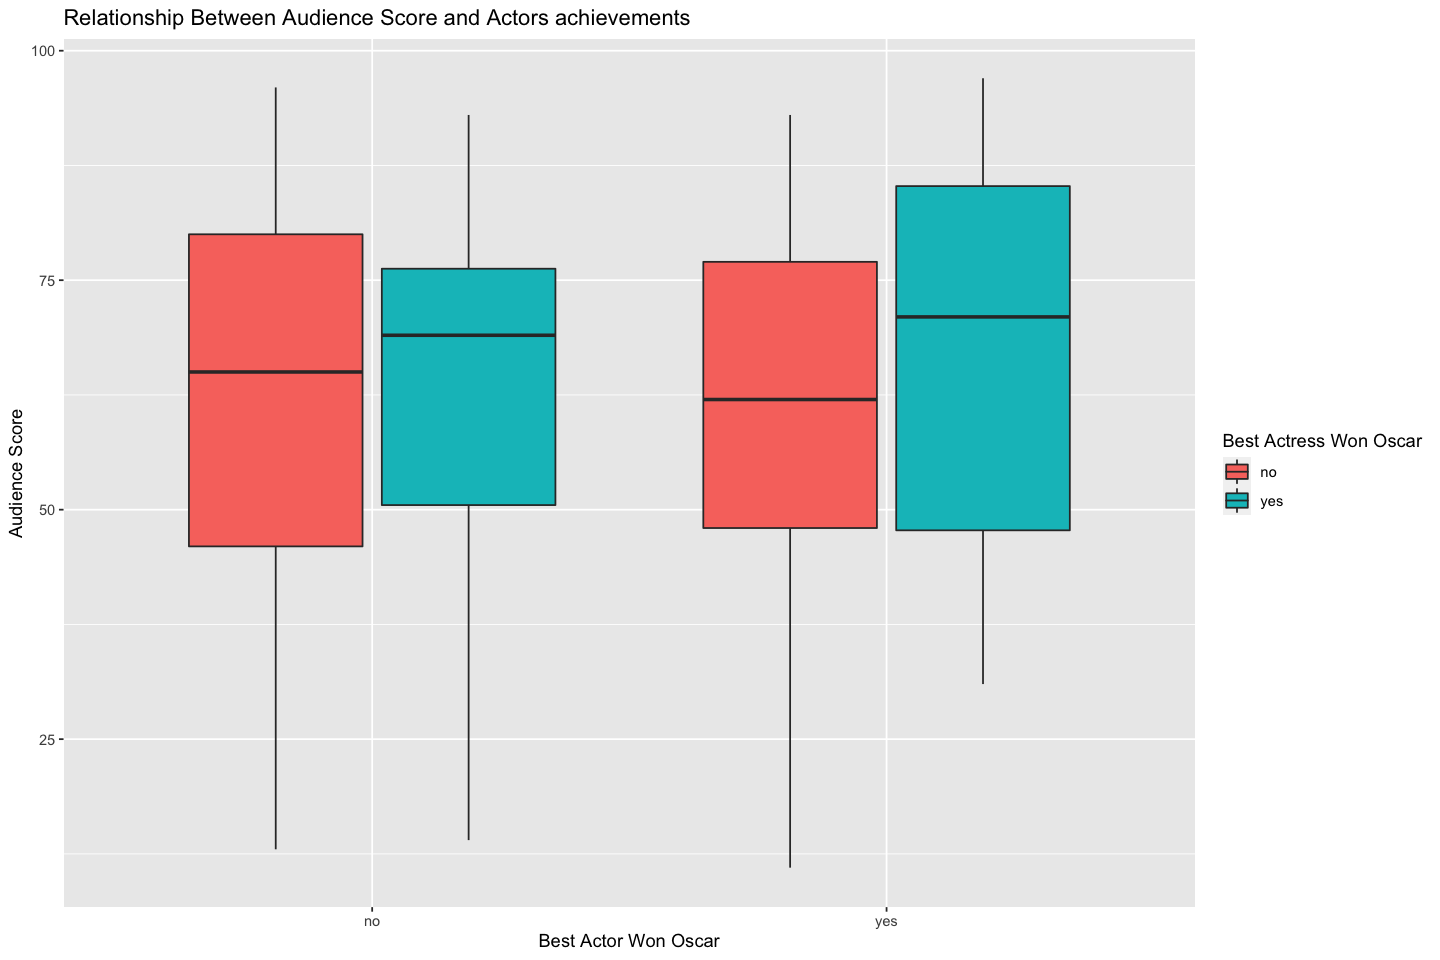

In [6]:
ggplot(data = movies, aes(x = best_actor_win, y = audience_score, fill = best_actress_win)) +
  geom_boxplot() +
  labs(x = "Best Actor Won Oscar", y = "Audience Score", fill = "Best Actress Won Oscar") +
  ggtitle("Relationship Between Audience Score and Actors achievements")

In [7]:
# Run an ANOVA
anova_fit = aov(formula = audience_score ~ best_actor_win * best_actress_win, 
                data = movies)

# Print summary results
summary(anova_fit)

                                 Df Sum Sq Mean Sq F value Pr(>F)
best_actor_win                    1     87    87.0   0.212  0.645
best_actress_win                  1    155   155.1   0.378  0.539
best_actor_win:best_actress_win   1    318   317.7   0.775  0.379
Residuals                       647 265261   410.0               

**Task C**

1. Plot the number of movies in each `mpaa_rating` category.

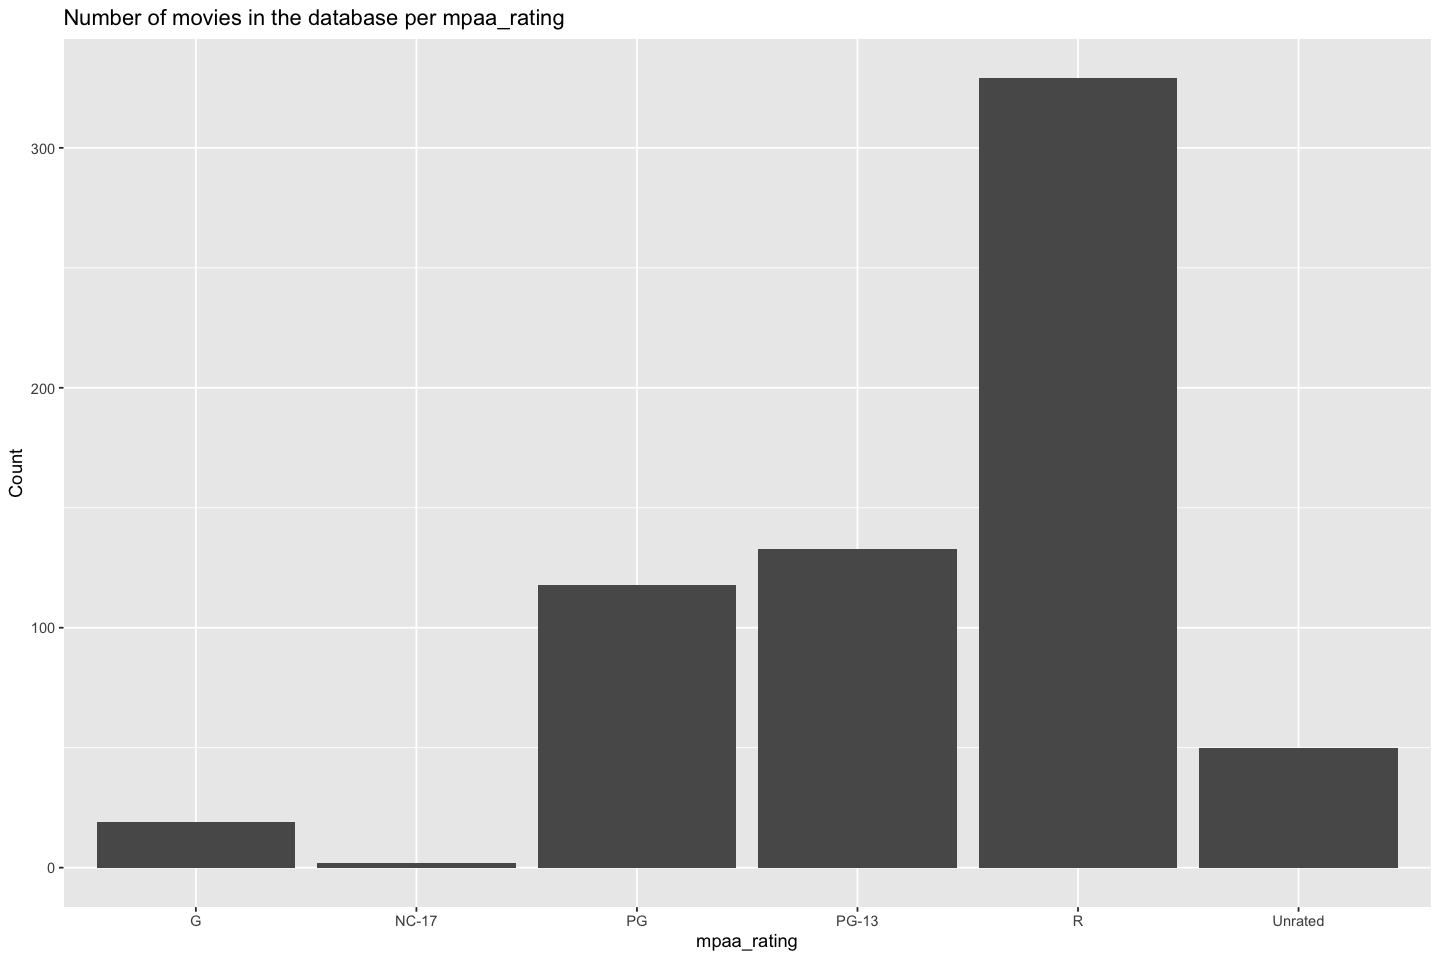

In [8]:
ggplot(data = movies, aes(x = mpaa_rating)) +
  geom_bar() +
  ggtitle("Number of movies in the database per mpaa_rating") +
  labs(x = "mpaa_rating", y = "Count")